**TP n°4** : Deep Learning pour le clustering en grande dimension

#Plan

##Partie I:

Rappels sur le clustering:
- k-moyennes , un rapide rappel
- problème non-linéaire - espace de redescription
- les limites de la grande dimension

##Partie II:

- réduire la dimensionnalité avec un auto-encodeur
- séparer linéairement avec un auto-encodeur variationnel


Durée : 2 h

**Partie I** : Rappels sur le partitionnement des données (*clustering*)

Dans cette partie, on illustre la méthode des k-moyennes pour trouver des groupes naturels de points dans un jeu de données. Trois questions sont soulevées: 
- comment sélectionner le "bon" nombre de clusters ?
- comment faire lorsque les populations ne sont pas linéairement séparables ?
- que se passe-t-il en grande dimension ?

La première question a surtout une importance pratique. Ce sont les deux autres questions qui, pour les applications du Machine Learning aux données image/son/texte, sont les plus intéressantes. On les présente ici pour y revenir avec des réseaux neurones profonds en partie II. 

**Exercice n°1**

Donnons-nous d'abord une population de points linéairement séparables:

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

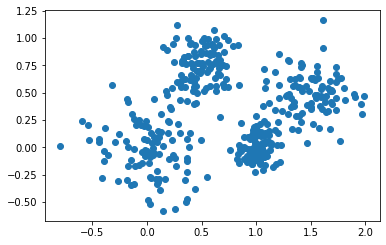

In [2]:
# Mélange de quatre populations qu'il va falloir séparer
# à partir des données
size = 100
popA = np.random.normal(loc=np.array([0,0]), scale=0.25, size=(size,2))
popB = np.random.normal(loc=np.array([1,0]), scale=0.1, size=(size,2))
popC = np.random.normal(loc=np.array([0.5,0.75]), scale=0.15, size=(size,2))
popD = np.random.normal(loc=np.array([1.5,0.5]), scale=0.2, size=(size,2))
np.random.normal()
data = np.concatenate((popA,popB,popC,popD), axis=0)

#plotpop
x_val = data[:,0]
y_val = data[:,1]
ax = plt.gca()
#Pour un tracé avec des unités identiques sur les deux axes:
ax.set_aspect('equal', adjustable='box')
plt.scatter(x_val,y_val)

**Q1** Appliquer les k-moyennes à la population de façon à séparer les trois groupes.

In [ ]:
# TODO
# import 
kmeans = ...

In [ ]:
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.scatter(x_val,y_val, c=kmeans.labels_)

C'est une méthode itérative, empirique, qui répond au problème de minimisation de la distance intra-classe. Un schéma explicatif:

https://fr.wikipedia.org/wiki/K-moyennes#/media/Fichier:K-means.png

**Q2** Comment peut-on sélectionner le nombre de clusters ?

In [ ]:
#Méthode "Elbow"
# Appliquer K-Means avec k=2,...,10

inerties = ...

# Tracer les inerties 
plt.plot(range(2,10), inerties)

**Exercice 2**

Donnons-nous maintenant un problème de séparation non-linéaire. 
Visualiser les données, puis définir une fonction $f$ qui plonge les données dans un "espace de redescription" où le problème peut être traité efficacement par k-means.


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('drive/MyDrive/TP_ENM_2223')


In [ ]:
data = np.load('data_for_Q3.npy')

x_val = data[:,0]
y_val = data[:,1]
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.scatter(x_val,y_val)

Q3 : Appliquer K-Means sur cet ensemble de données avec 4 clusters. Qu'est-ce qui ne va pas ?

In [ ]:
# si l'on applique KMeans bille en tête:

print("population de taille: " + str(data.shape[0]))
print("dans un espace de dimension: " + str(data.shape[1]))
kmeans = ...

x_val = data[:,0]
y_val = data[:,1]
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.scatter(x_val, y_val, c=kmeans.labels_)

Q4 : Appliquer la fonction suivante sur les données $$f(x_1,x_2)=(x_2^2+x_2^2,arctan(x_1,x_2))$$ puis relancer K-Means.

In [ ]:
#Si l'on transforme les données avec une fonction bien choisie:
# utilisez la fonction np.arctan2
f = lambda x: ...

data2 = 0*data

for i in range(data.shape[0]):
  data2[i,:] = f(data[i,:])

kmeans = ...

x_val = data[:,0]
y_val = data[:,1]
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.scatter(x_val, y_val, c=kmeans.labels_)

Remarque : La recherche du bon espace de description est difficile à automatiser. Une façon de faire consiste à travailler avec une famille de fonctions de base (voir par exemple [cette bibliothèque](https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.KernelKMeans.html)). 

-> remarque pratique: kernel trick
-> remarque de fond : la séparation linéaire n'est pas une cond.
suffisante pour que le kmeans converge (ex: si l'on se contente des coordonnées polaires. Autre exemple en reprenant la notion d'inertie en ML**3 pour des barres solides)

**Exercice 3** 

Et en grande dimension ?
On se donne maintenant un jeu de points dans un ensemble de *dimension* arbitraire. 

In [ ]:
# Echantillonnage des trois vecteurs gaussiens et concaténation
size = 100
ndim = 64*64
sigma = 0.2
popA = np.random.normal(loc=np.array([1] + [0 for i in range(ndim-1)]), scale=sigma, size=(size,ndim))
popB = np.random.normal(loc=np.array([0 for i in range(ndim)]), scale=sigma, size=(size,ndim))
popC = np.random.normal(loc=np.array([-1] + [0 for i in range(ndim-1)]), scale=sigma, size=(size,ndim))
np.random.normal()
data = np.concatenate((popA,popB,popC), axis=0)

print("population de taille: " + str(data.shape[0]))
print("dans un espace de dimension: " + str(data.shape[1]))

**Q1** Visualiser les deux premiers attributs dans un plan. Le jeu est-il 
linéairement séparable ?



In [ ]:
# TODO

**Q2** Passer l'algo sur le jeu de données. Expliquer. On pourra utiliser la matrice des distances (voir deuxième cellule).

In [ ]:
#clustering
kmeans = ...

# Affichage - TODO
plt.show()

In [ ]:
# Raison : fléau des grandes dimensions
# voyons les matrice des distances entre les points de popA et popB:
from scipy.spatial import distance_matrix

dist = distance_matrix(data, data)
from matplotlib.pyplot import imshow
plt.figure(2)
imshow(dist, vmin=0, vmax=np.sqrt(ndim), cmap='jet')
# imshow(dist, vmin=mu - std, vmax=mu+std, cmap='jet')
plt.colorbar()

In [ ]:
#Pour obtenir le bon scaling:
from scipy.special import gamma


# mu_cr = np.sqrt(2) * gamma((ndim+1)/2)/gamma(ndim/2)
# mu = sigma * np.sqrt(2) * mu_cr
# std = np.sqrt(sigma**2*2*(ndim - mu_cr**2))
# print(mu,std)


# ou pour k grand: (voir https://en.wikipedia.org/wiki/Chi_distribution)
# avec la formule de Stirling
mu_cr = np.sqrt(ndim - 1) * (1 - 1/(4*ndim))
mu = sigma * np.sqrt(2) * mu_cr  
std = np.sqrt(sigma**2*2*(ndim - mu_cr**2))
print(f"{mu:0.2f},{std:0.2f}")


Cet exercice illustre le fait qu'en grande dimension, un problème de partitionnement "simple" met en échec l'algorithme des k-moyennes. Cette remarque valant pour les méthodes de partionnement en général, il est nécessaire de plonger les données dans un espace de dimension plus petite avant le partionnement.

Cette étape, appelée réduction de la dimensionnalité, peut-être faite de différentes manières. L'Analyse en Composantes Principales  fournit par exemple une projection linéaire.

Dans le partie II, nous présentons plutôt une approche par deep learning qui permet d'aborder en même temps les deux problèmes :  réduction de la dimensionnalité et linéarisation.